In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get the .cvs data
raw_data = pd.read_csv('network_backup_dataset.csv')

# find unique days and workflow
work_flows = np.sort(raw_data['Work-Flow-ID'].unique()) # 4 work flows
Day_of_Week =  raw_data['Day of Week'].unique() 
files = np.array(['File_{0}'.format(i) for i in range(len(raw_data['File Name'].unique()))],dtype=object)
row_num, col_num = raw_data.shape

#add one more day# col 
raw_data['day#'] = pd.Series([(row['Week #'] -1 )*7 + 1 +
                              np.where(Day_of_Week == row['Day of Week'])[0][0] 
                              for i, row in raw_data.iterrows()])

# Problem 1 

### print 20 days

In [2]:
#set days to print
days =20

#create empty dict of {flow:[size]}
work_flow_perday = dict(zip(work_flows,[[0]*days for i in work_flows]))
for index, row in raw_data.iterrows():
    if row['day#']>days: break
    work_flow_perday[row['Work-Flow-ID']][row['day#']-1] += row['Size of Backup (GB)']
    
# make it a pandas dataFrame
df_work_flow = pd.DataFrame(data = work_flow_perday)

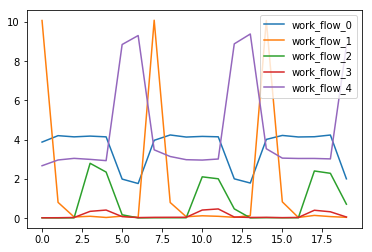

In [3]:
for work_flow in work_flows:
    df_work_flow[work_flow].plot()
plt.legend(work_flows)

### plot 105 days

In [4]:
#set days to print
days = 105

#create empty dict of {flow:[size]}
work_flow_perday = dict(zip(work_flows,[[0]*days for i in work_flows]))
for index, row in raw_data.iterrows():
    if row['day#']>days: break
    work_flow_perday[row['Work-Flow-ID']][row['day#']-1] += row['Size of Backup (GB)']
    
# make it a pandas dataFrame
df_work_flow = pd.DataFrame(data = work_flow_perday)

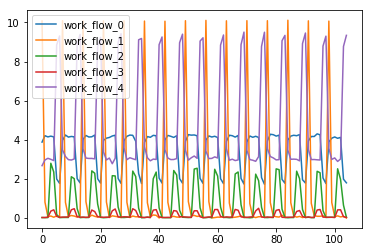

In [5]:
for work_flow in work_flows:
    df_work_flow[work_flow].plot()
plt.legend(work_flows)

# Problem 2 

In [6]:
# empty X
X = np.zeros([raw_data.shape[0],5])

# create dict for 3 features
weekday_dict = dict(zip(Day_of_Week, range(Day_of_Week.shape[0])))
workflow_dict = dict(zip(work_flows, range(work_flows.shape[0])))
files_dict = dict(zip(files, range(files.shape[0])))

# create scalar feature dataframe
scalar_data = raw_data.replace({'Day of Week': weekday_dict,
                                'Work-Flow-ID':workflow_dict,
                                'File Name': files_dict})

# convert scalar dataframe to np matrix
X = scalar_data.iloc[:,:5].values
y = scalar_data.iloc[:,5].values

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# cross validation
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []
for train_index, test_index in kf.split(X):
    # define model used to fit
    model = LinearRegression()
    # split datas
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # do prediction
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # calculate rmse
    train_rmse.append(metrics.mean_squared_error(y_train,y_pred_train))
    test_rmse.append(metrics.mean_squared_error(y_test,y_pred_test))

# find the best y_pred under the best parameter
model = LinearRegression()
y_pred = cross_val_predict(model,X,y,cv=10)

# calculate y residual
y_res = y - y_pred

# print result of rmse
print(np.average(train_rmse))
print(np.average(test_rmse))

0.010729933776129276
0.010748681391335144


/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


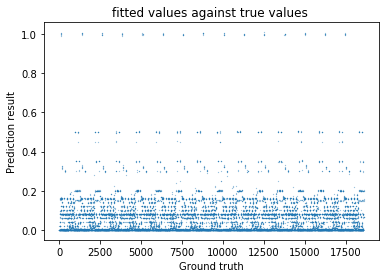

In [8]:
# plot fitted values against true values scattered
plt.scatter(range(y.shape[0]),y,s=0.03)
# plt.scatter(y_pred,s=0.03)
plt.ylabel('Prediction result')
plt.xlabel('Ground truth')
plt.title('fitted values against true values ')
plt.show()

# # Plot residuals versus fitted values scattered
# plt.scatter(y_res,y_pred,s=0.03)
# plt.xlabel('Prediction result')
# plt.ylabel('Residual')
# plt.title('residuals versus fitted values ')
# plt.show()

### 2 ii）preprocessing the data

In [9]:
from sklearn.preprocessing import StandardScaler
# normalized model
scaler = StandardScaler()
# applied on X
scaler.fit(X)
X_normed = scaler.transform(X)

/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# cross validation
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []
for train_index, test_index in kf.split(X_normed):
    # define model used to fit
    model = LinearRegression()
    # split datas
    X_train, X_test = X_normed[train_index], X_normed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # do prediction
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # calculate rmse
    train_rmse.append(metrics.mean_squared_error(y_train,y_pred_train))
    test_rmse.append(metrics.mean_squared_error(y_test,y_pred_test))

# find the best y_pred under the best parameter
model = LinearRegression()
y_pred = cross_val_predict(model,X_normed,y,cv=10)

# calculate y residual
y_res = y - y_pred

# print result of rmse
print(np.average(train_rmse))
print(np.average(test_rmse))

0.010729933776129276
0.010748681391335144


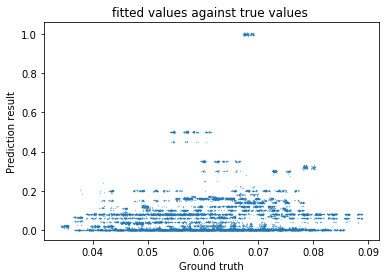

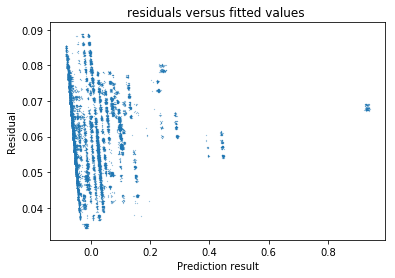

In [11]:
# plot fitted values against true values scattered
plt.scatter(y_pred,y,s=0.03)
plt.ylabel('Prediction result')
plt.xlabel('Ground truth')
plt.title('fitted values against true values ')
plt.show()

# Plot residuals versus fitted values scattered
plt.scatter(y_res,y_pred,s=0.03)
plt.xlabel('Prediction result')
plt.ylabel('Residual')
plt.title('residuals versus fitted values ')
plt.show()

### 2a iii) feature select

In [12]:
from sklearn.feature_selection import f_regression, mutual_info_regression
# F test
f_test, _ = f_regression(X_normed, y)
f_test /= np.max(f_test)

# mutal info
mi = mutual_info_regression(X_normed, y)
mi /= np.max(mi)

# print result
for i in range(5):
    print("F-test = {:.2f}, Mi = {:.2f} for feature {:.0f}".format(f_test[i], mi[i],i+1))


F-test = 0.00, Mi = 0.00 for feature 1
F-test = 0.26, Mi = 0.30 for feature 2
F-test = 1.00, Mi = 0.39 for feature 3
F-test = 0.17, Mi = 0.99 for feature 4
F-test = 0.17, Mi = 1.00 for feature 5


In [13]:
# selected feature based on the input above
X_selected = X_normed[:,2:]

In [14]:
# cross validation
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []
for train_index, test_index in kf.split(X_selected):
    # define model used to fit
    model = LinearRegression()
    # split datas
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # do prediction
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # calculate rmse
    train_rmse.append(metrics.mean_squared_error(y_train,y_pred_train))
    test_rmse.append(metrics.mean_squared_error(y_test,y_pred_test))

# find the best y_pred under the best parameter
model = LinearRegression()
y_pred = cross_val_predict(model,X_selected,y,cv=10)

# calculate y residual
y_res = y - y_pred

# print result of rmse
print(np.average(train_rmse))
print(np.average(test_rmse))

0.010752555177283792
0.010768688809144661


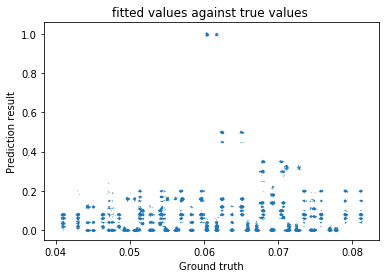

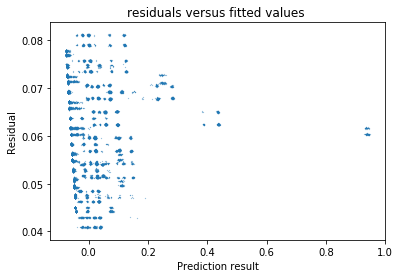

In [15]:
# plot fitted values against true values scattered
plt.scatter(y_pred,y,s=0.03)
plt.ylabel('Prediction result')
plt.xlabel('Ground truth')
plt.title('fitted values against true values ')
plt.show()

# Plot residuals versus fitted values scattered
plt.scatter(y_res,y_pred,s=0.03)
plt.xlabel('Prediction result')
plt.ylabel('Residual')
plt.title('residuals versus fitted values ')
plt.show()

### 2 a iv) Feature Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations, permutations
from sklearn.model_selection import cross_validate

feature_rmse_train = []
feature_rmse_test = []
# build 32 masks
masks = list(set(list(permutations([1]*5+[0]*5, 5))))

for mask in masks:
    # one hot encoding
    cat_feature = [i for i in range(5) if mask[i]]
    enc = OneHotEncoder(categorical_features=cat_feature)
    enc.fit(X) 
    X_enc = enc.transform(X)
    # regresion model
    model = LinearRegression()
    
    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')
    feature_rmse_test.append(np.average(cv_results['test_score']))
    feature_rmse_train.append(np.average(cv_results['train_score']))
    

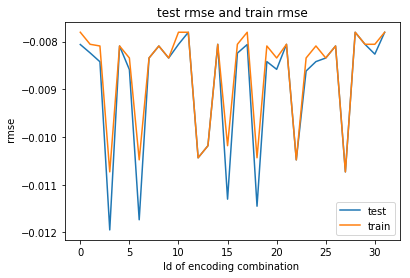

Best mask :  (0, 1, 1, 1, 0)
worst mask :  (1, 0, 0, 0, 0)


In [17]:
# plot 32 models
plt.plot(feature_rmse_test)
plt.plot(feature_rmse_train)
plt.ylabel(' rmse')
plt.xlabel('Id of encoding combination ')
plt.title('test rmse and train rmse')
plt.legend(['test','train'])
plt.show()

# find the mask with best error
print("Best mask : ",masks[np.argmax(feature_rmse_test)])
# the worst one did not hot code the string item
print("worst mask : ",masks[np.argmin(feature_rmse_test)])

### 2 a v) Controlling ill-conditioning and over-fiting:

### Ridge

In [18]:
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations, permutations
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

feature_rmse_train = []
feature_rmse_test = []
# build 32 masks
masks = list(set(list(permutations([1]*5+[0]*5, 5))))

for mask in masks:
    
    # one hot encoding
    cat_feature = [i for i in range(5) if mask[i]]
    enc = OneHotEncoder(categorical_features=cat_feature)
    enc.fit(X) 
    X_enc = enc.transform(X)
    
    # regresion model
    model = Ridge(alpha=1.0)
    
    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')
    
    feature_rmse_test.append(np.average(cv_results['test_score']))
    feature_rmse_train.append(np.average(cv_results['train_score']))
    

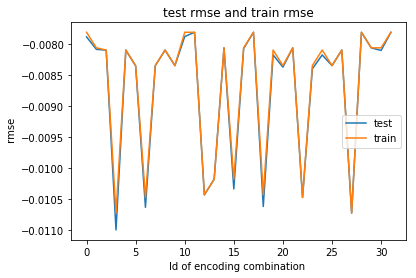

Best mask :  (1, 1, 1, 1, 0)
worst mask :  (1, 0, 0, 0, 0)


In [19]:
# plot 32 models
plt.plot(feature_rmse_test)
plt.plot(feature_rmse_train)
plt.ylabel(' rmse')
plt.xlabel('Id of encoding combination ')
plt.title('test rmse and train rmse')
plt.legend(['test','train'])
plt.show()

# find the mask with best error
print("Best mask : ",masks[np.argmax(feature_rmse_test)])
# the worst one did not hot code the string item
print("worst mask : ",masks[np.argmin(feature_rmse_test)])

In [20]:
# use the best mask
mask = masks[np.argmax(feature_rmse_test)]

# optimize parameter
alphas = [10**i for i in range(-3,2)]

# empty rmse list
feature_rmse_train = []
feature_rmse_test = []

for alpha in alphas:
    # one hot encoding
    cat_feature = [i for i in range(5) if mask[i]]
    enc = OneHotEncoder(categorical_features=cat_feature)
    enc.fit(X) 
    X_enc = enc.transform(X)
    
    # regresion model
    model = Ridge(alpha=alpha)
    
    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')
    
    feature_rmse_test.append(np.average(cv_results['test_score']))
    feature_rmse_train.append(np.average(cv_results['train_score']))



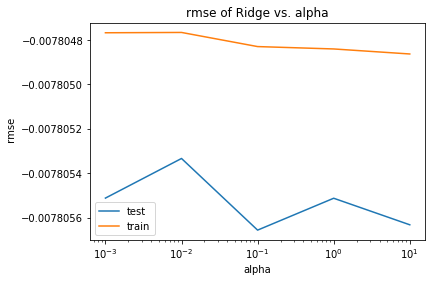

In [21]:
# plot models for different parameters
plt.semilogx(alphas,feature_rmse_test)
plt.semilogx(alphas,feature_rmse_train)
plt.ylabel(' rmse')
plt.xlabel('alpha')
plt.title('rmse of Ridge vs. alpha')
plt.legend(['test','train'])
plt.show()

### Lasso

In [22]:
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations, permutations
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso

feature_rmse_train = []
feature_rmse_test = []
# build 32 masks
masks = list(set(list(permutations([1]*5+[0]*5, 5))))

for mask in masks:
    
    # one hot encoding
    cat_feature = [i for i in range(5) if mask[i]]
    enc = OneHotEncoder(categorical_features=cat_feature)
    enc.fit(X) 
    X_enc = enc.transform(X)
    
    # regresion model
    model = Lasso(alpha=1.0)
    
    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')
    
    feature_rmse_test.append(np.average(cv_results['test_score']))
    feature_rmse_train.append(np.average(cv_results['train_score']))
    

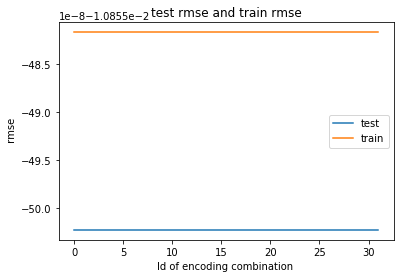

Best mask :  (1, 1, 1, 0, 1)
worst mask :  (1, 1, 1, 0, 1)


In [23]:
# plot 32 models
plt.plot(feature_rmse_test)
plt.plot(feature_rmse_train)
plt.ylabel(' rmse')
plt.xlabel('Id of encoding combination ')
plt.title('test rmse and train rmse')
plt.legend(['test','train'])
plt.show()

# find the mask with best error
print("Best mask : ",masks[np.argmax(feature_rmse_test)])
# the worst one did not hot code the string item
print("worst mask : ",masks[np.argmin(feature_rmse_test)])

In [24]:
# use the best mask
mask = masks[np.argmax(feature_rmse_test)]

# optimize parameter
alphas = [10**i for i in range(-3,3)]

# empty rmse list
feature_rmse_train = []
feature_rmse_test = []

for alpha in alphas:
    # one hot encoding
    cat_feature = [i for i in range(5) if mask[i]]
    enc = OneHotEncoder(categorical_features=cat_feature)
    enc.fit(X) 
    X_enc = enc.transform(X)
    
    # regresion model
    model = Lasso(alpha=alpha)
    
    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')
    
    feature_rmse_test.append(np.average(cv_results['test_score']))
    feature_rmse_train.append(np.average(cv_results['train_score']))


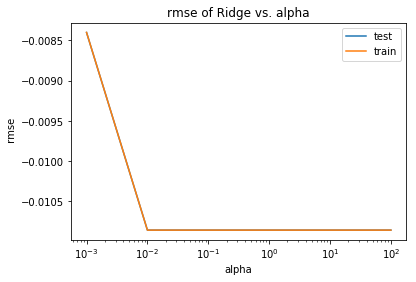

In [25]:
# plot models for different parameters
plt.semilogx(alphas,feature_rmse_test)
plt.semilogx(alphas,feature_rmse_train)
plt.ylabel(' rmse')
plt.xlabel('alpha')
plt.title('rmse of Ridge vs. alpha')
plt.legend(['test','train'])
plt.show()

### ElasticNet

In [26]:
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations, permutations
from sklearn.model_selection import cross_validate
from sklearn.linear_model import ElasticNet

feature_rmse_train = []
feature_rmse_test = []
# build 32 masks
masks = list(set(list(permutations([1]*5+[0]*5, 5))))

for mask in masks:
    
    # one hot encoding
    cat_feature = [i for i in range(5) if mask[i]]
    enc = OneHotEncoder(categorical_features=cat_feature)
    enc.fit(X) 
    X_enc = enc.transform(X)
    
    # regresion model
    model = ElasticNet(alpha=0.01, l1_ratio=0.01)
    
    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')
    
    feature_rmse_test.append(np.average(cv_results['test_score']))
    feature_rmse_train.append(np.average(cv_results['train_score']))
    

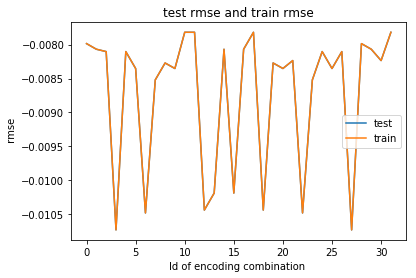

Best mask :  (1, 1, 1, 1, 1)
worst mask :  (0, 0, 0, 0, 0)


In [27]:
# plot 32 models
plt.plot(feature_rmse_test)
plt.plot(feature_rmse_train)
plt.ylabel(' rmse')
plt.xlabel('Id of encoding combination ')
plt.title('test rmse and train rmse')
plt.legend(['test','train'])
plt.show()

# find the mask with best error
print("Best mask : ",masks[np.argmax(feature_rmse_test)])
# the worst one did not hot code the string item
print("worst mask : ",masks[np.argmin(feature_rmse_test)])

In [28]:
# use the best mask
mask = masks[np.argmax(feature_rmse_test)]

# optimize parameter
alphas = [10**i for i in range(-2,2)]
lamdas = np.arange(0,1,0.1)

# empty 2D rmse error

feature_rmse_test = []

for alpha in alphas:
    temp1 = []
    for l in lamdas:
        # one hot encoding
        cat_feature = [i for i in range(5) if mask[i]]
        enc = OneHotEncoder(categorical_features=cat_feature)
        enc.fit(X) 
        X_enc = enc.transform(X)

        # regresion model
        model = ElasticNet(alpha=alpha, l1_ratio=l)

        # validation score for each fold
        cv_results = cross_validate(model, X_enc, y, 
                                    return_train_score=True,
                                    scoring='neg_mean_squared_error')
        temp1.append(np.average(cv_results['test_score']))

    feature_rmse_test.append(temp1)


/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_

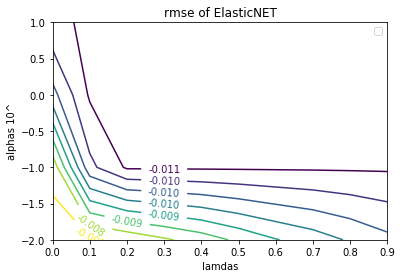

In [30]:
# plot models for different parameters
# Train and test are exactly same for this one

CS = plt.contour(lamdas, range(-2,2),feature_rmse_test)
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('alphas 10^')
plt.xlabel('lamdas')
plt.title('rmse of ElasticNET')
plt.legend(['test','train'])
plt.show()

## KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor

# optimize parameter
ks = range(1,100)

# empty 2D rmse error

rmse_test = []
rmse_train = []

for k in ks:
    # noneed for encoding 
    
    # regresion model
    model = KNeighborsRegressor(n_neighbors=k)

    # validation score for each fold
    cv_results = cross_validate(model, X_enc, y, 
                                return_train_score=True,
                                scoring='neg_mean_squared_error')

    rmse_test.append(np.average( np.sqrt(-cv_results['test_score']) ))
    rmse_train.append(np.average( np.sqrt(-cv_results['train_score']) ))
    

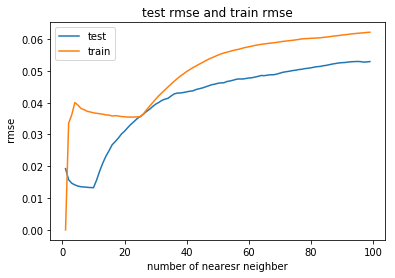

Best k :  10


In [41]:
# plot 32 models
plt.plot(ks,rmse_test)
plt.plot(ks,rmse_train)
plt.ylabel(' rmse')
plt.xlabel('number of nearesr neighber')
plt.title('test rmse and train rmse')
plt.legend(['test','train'])
plt.show()

# find the k with best error
print("Best k : ",ks[np.argmin(rmse_test)])


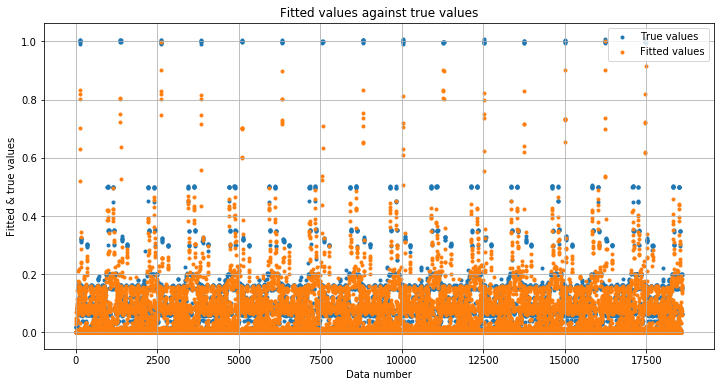

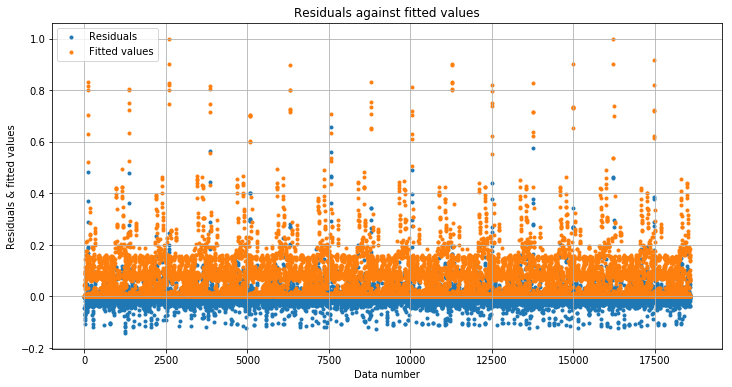

In [109]:
# Use the whole data set for training
model_whole = KNeighborsRegressor(n_neighbors=10)
model_whole.fit(X_enc, y)
predict_values = model_whole.predict(X_enc)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, y.shape[0] + 1), y, marker='.', label='True values')
plt.scatter(range(1, y.shape[0] + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_e_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, y.shape[0] + 1), y - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, y.shape[0] + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_e_residuals.png')  # Save the figure
plt.show()

## workflow seperately

In [ ]:
# craete empty array for each work flow
X_workflows = dict(zip([0,1,2,3,4],[[0 ,0, 0, 0, 0,0]]*5 ))

# seperate the workflow from scalar_data 
X_scalar = scalar_data.values

for row in X_scalar:
    X_workflows[row[3]] = np.vstack((X_workflows[int(row[3])],row[:6]))

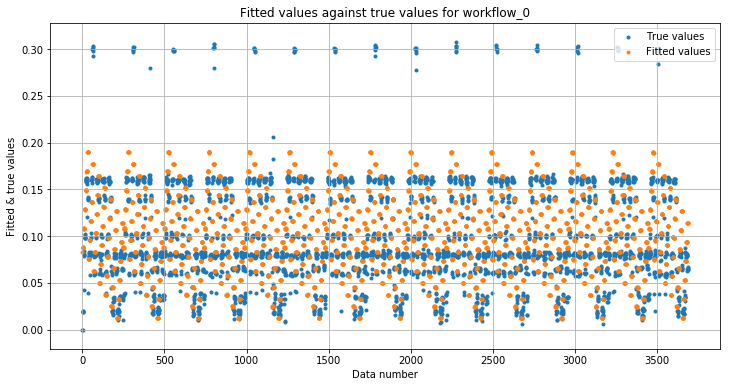

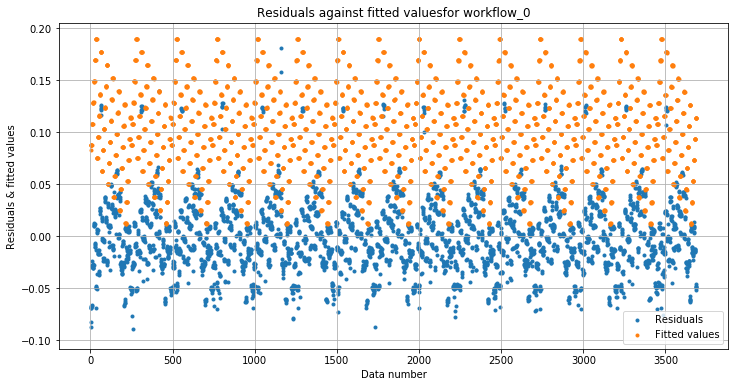

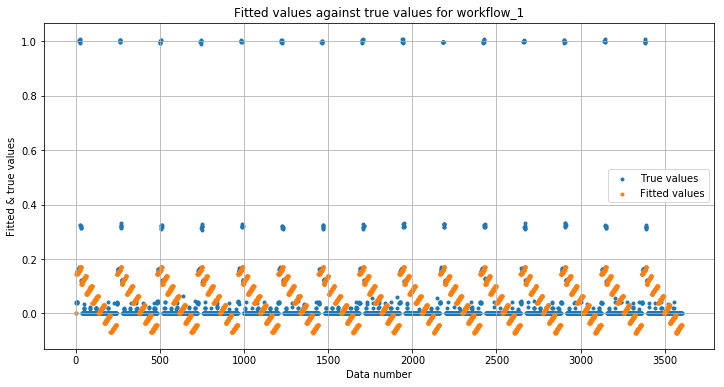

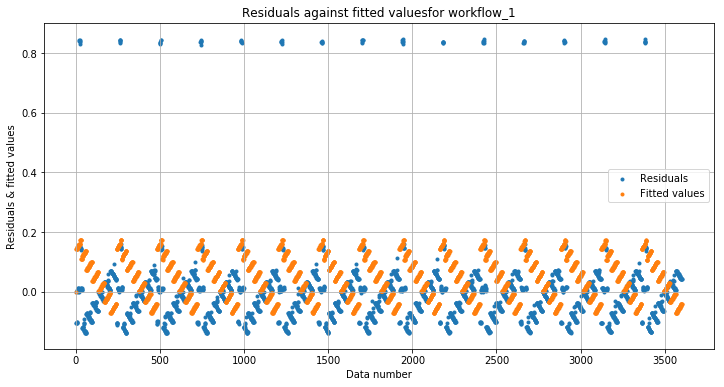

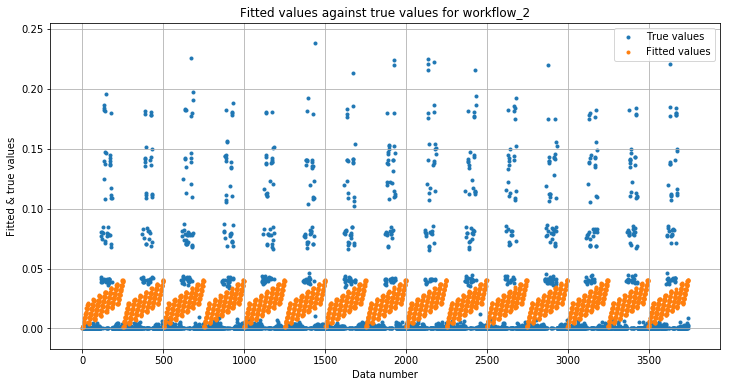

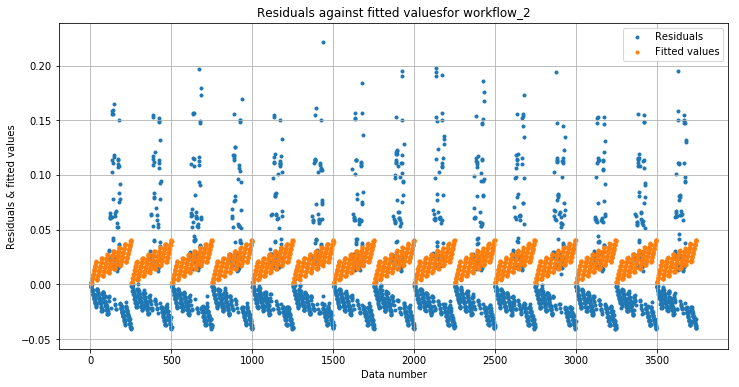

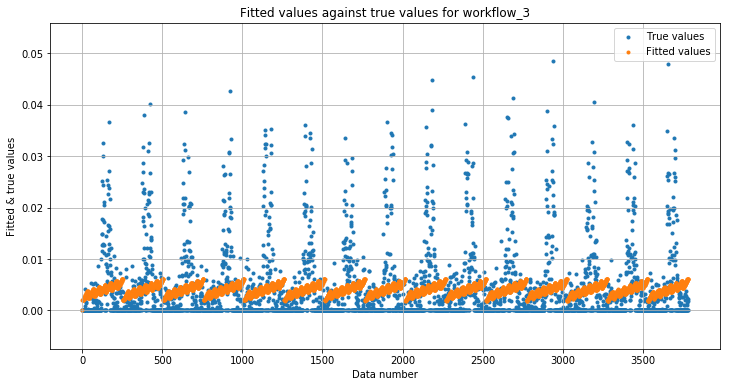

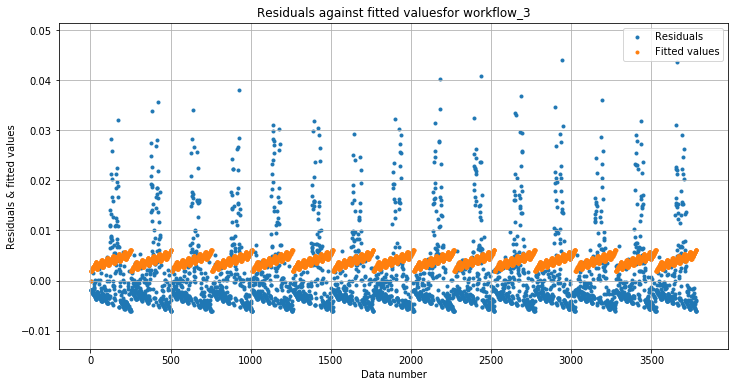

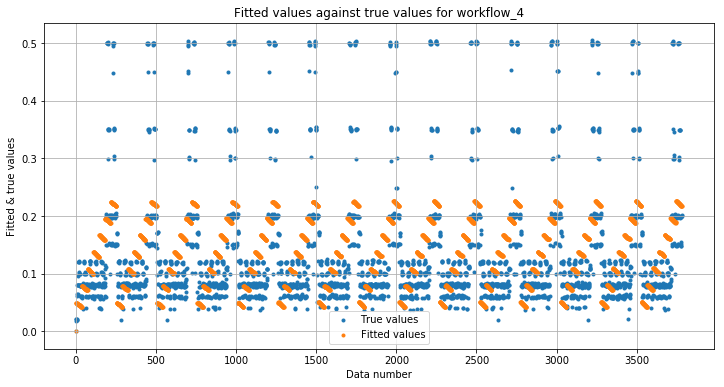

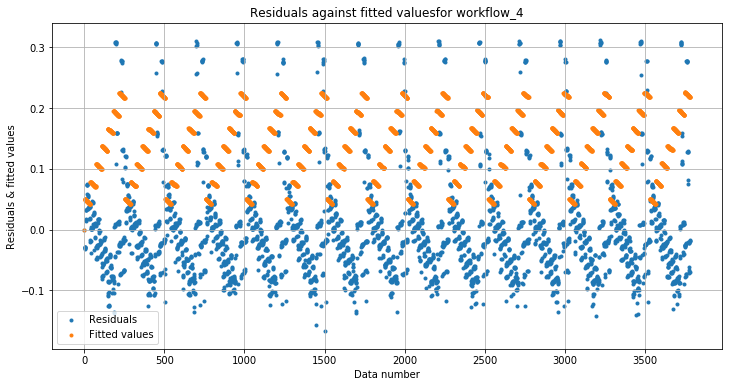

In [95]:
from sklearn.linear_model import LinearRegression
    
rmse_test = []
rmse_train = []
    
# cv to see the linear regression result
for key,workflow in X_workflows.items():
    X_sep = workflow[:,:5]
    y_sep = workflow[:,5]
    # in case need to report cv rmse
#     model = LinearRegression()
#     cv_results = cross_validate(model, X_sep, y_sep, 
#                                 return_train_score=True,
#                                 scoring='neg_mean_squared_error')
#     # save test-score for each workflow 
#     rmse_test.append(np.average( np.sqrt(-cv_results['test_score']) ))
#     rmse_train.append(np.average( np.sqrt(-cv_results['train_score']) ))
    
    # Use the whole data set for training
    model_whole = LinearRegression()
    model_whole.fit(workflow[:, 0:5], workflow[:, 5])
    predict_values = model_whole.predict(workflow[:, 0:5])
    
    # Plot fitted values against true values
    plt.figure(figsize=(12, 6))
    plt.title("Fitted values against true values for workflow_{}".format(key))
    plt.scatter(range(1, workflow.shape[0] + 1), workflow[:, 5], marker='.', label='True values')
    plt.scatter(range(1, workflow.shape[0] + 1), predict_values, marker='.', label='Fitted values')
    plt.xlabel('Data number')
    plt.ylabel('Fitted & true values')
    plt.grid()
    plt.legend()
    plt.savefig('Figures/Question2_d_i_fitted_workflow{}.png'.format(key))  # Save the figure
    plt.show()

    # Plot residuals against fitted values
    plt.figure(figsize=(12, 6))
    plt.title("Residuals against fitted valuesfor workflow_{}".format(key))
    plt.scatter(range(1, workflow.shape[0] + 1), workflow[:, 5] - predict_values, marker='.', label='Residuals')
    plt.scatter(range(1, workflow.shape[0] + 1), predict_values, marker='.', label='Fitted values')
    plt.xlabel('Data number')
    plt.ylabel('Residuals & fitted values')
    plt.grid()
    plt.legend()
    plt.savefig('Figures/Question2_d_i_residuals_workflow{}.png'.format(key))  # Save the figure
    plt.show()

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# work_flow * polynomial 
rmse_test = []
rmse_train = []
    
degrees = range(1,7)
# cv to see the linear regression result
for key,workflow in X_workflows.items():
    X_sep = workflow[:,:5]
    y_sep = workflow[:,5]
    
    rmse_test_degree = []
    rmse_train_degree = []
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_sep)
        
        # regresion model
        model = LinearRegression()

        # validation score for each fold
        cv_results = cross_validate(model, X_poly, y_sep, 
                                    return_train_score=True,
                                    scoring='neg_mean_squared_error')

        rmse_test_degree.append(np.average( np.sqrt(-cv_results['test_score']) ))
        rmse_train_degree.append(np.average( np.sqrt(-cv_results['train_score']) ))
        
        
    rmse_test.append(rmse_test_degree)
    rmse_train.append(rmse_train_degree)


    

### for differnt degree

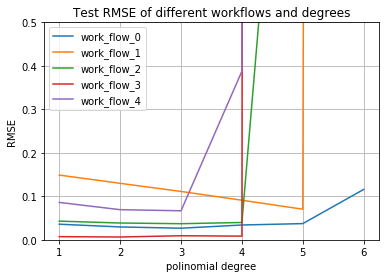

In [143]:
# plot for test
# change to np array # rmse_test = work_flow * polynomial
rmse_test_array = np.array(rmse_test).T

plt.figure()
plt.title("Test RMSE of different workflows and degrees")
plt.plot(degrees, rmse_test_array)

plt.xlabel('polinomial degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend(work_flows)
plt.xticks(degrees)
plt.ylim((0,0.5))
plt.show()
        
        



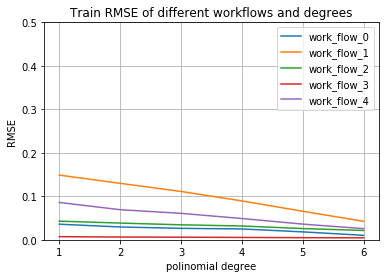

In [144]:
# plot for train
# change to np array # rmse_test = work_flow * polynomial 
rmse_train_array = np.array(rmse_train).T

plt.figure()
plt.title('Train RMSE of different workflows and degrees')
plt.plot(degrees,rmse_train_array)

plt.xlabel('polinomial degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend(work_flows)
plt.xticks(degrees)
plt.ylim((0,0.5))
plt.show()
        

### plot with best degree

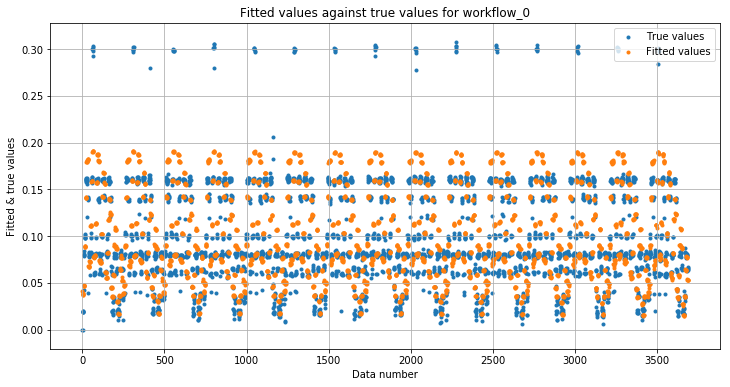

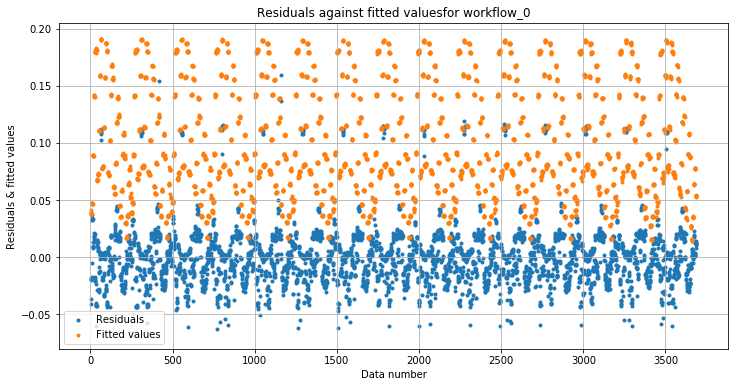

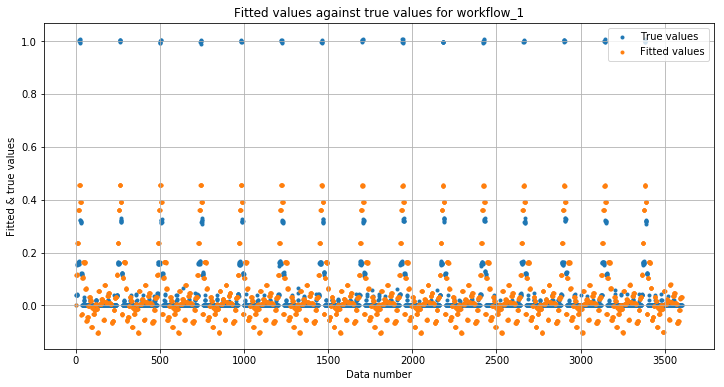

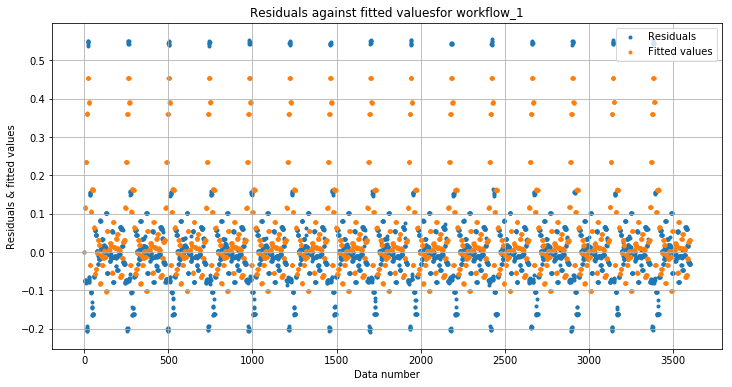

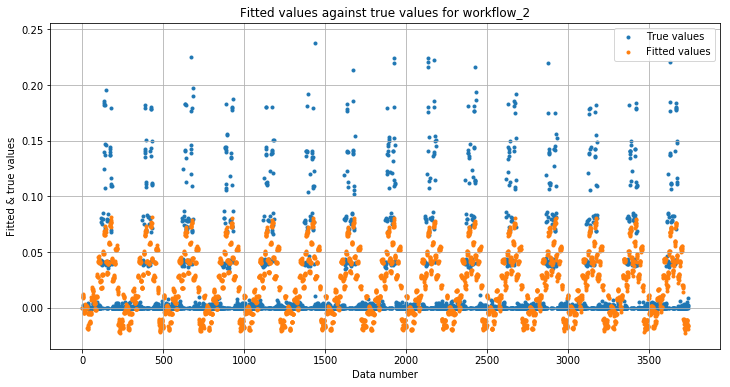

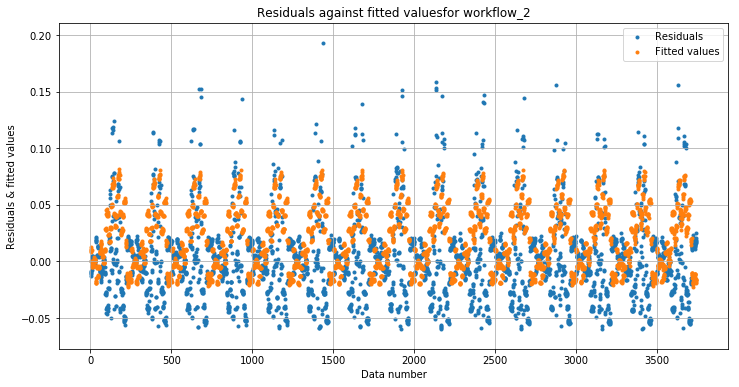

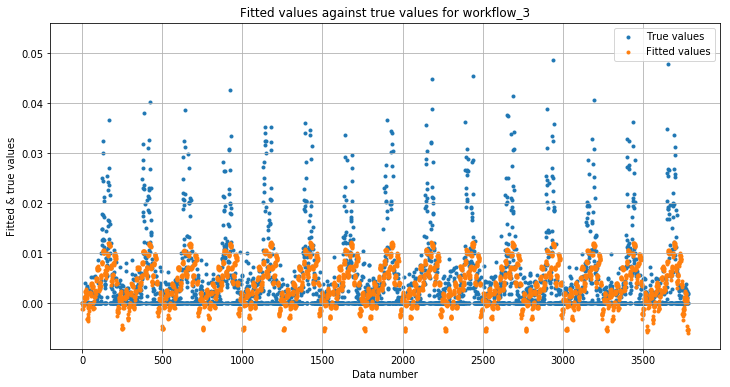

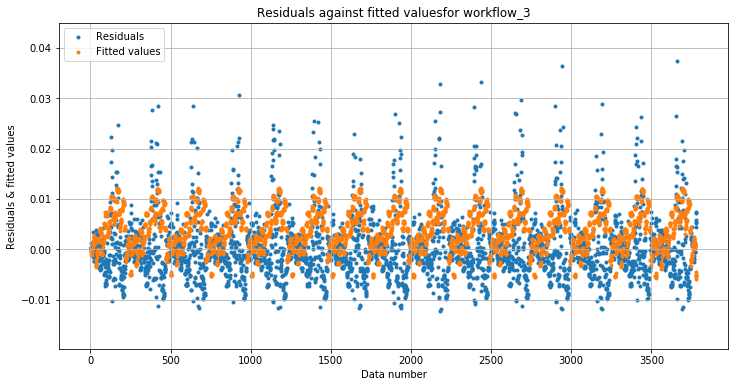

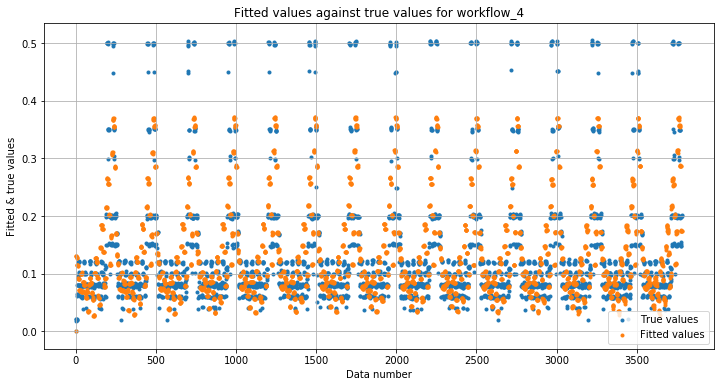

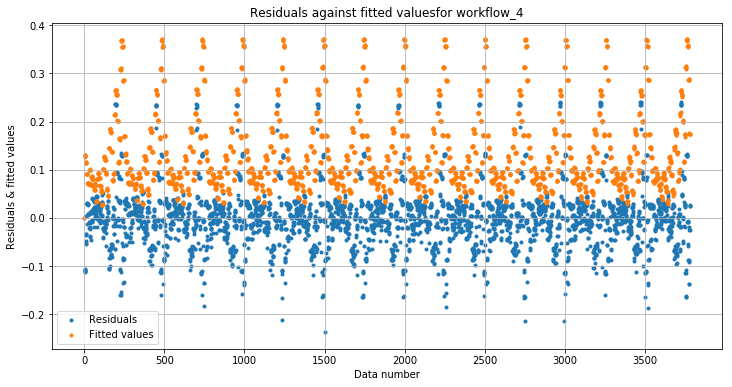

In [146]:
from sklearn.linear_model import LinearRegression
    
rmse_test = []
rmse_train = []
    
# cv to see the linear regression result
for key,workflow in X_workflows.items():
    X_sep = workflow[:,:5]
    y_sep = workflow[:,5]
    
    poly = PolynomialFeatures(3)
    X_poly = poly.fit_transform(X_sep)
    
    # Use the whole data set for training
    model_whole = LinearRegression()
    model_whole.fit(X_poly, y_sep)
    predict_values = model_whole.predict(X_poly)
    
    # Plot fitted values against true values
    plt.figure(figsize=(12, 6))
    plt.title("Fitted values against true values for workflow_{}".format(key))
    plt.scatter(range(1, y_sep.shape[0] + 1), y_sep, marker='.', label='True values')
    plt.scatter(range(1, y_sep.shape[0] + 1), predict_values, marker='.', label='Fitted values')
    plt.xlabel('Data number')
    plt.ylabel('Fitted & true values')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot residuals against fitted values
    plt.figure(figsize=(12, 6))
    plt.title("Residuals against fitted valuesfor workflow_{}".format(key))
    plt.scatter(range(1, y_sep.shape[0] + 1), y_sep - predict_values, marker='.', label='Residuals')
    plt.scatter(range(1, y_sep.shape[0] + 1), predict_values, marker='.', label='Fitted values')
    plt.xlabel('Data number')
    plt.ylabel('Residuals & fitted values')
    plt.grid()
    plt.legend()
    plt.savefig('Figures/Question2_d_i_residuals_workflow{}.png'.format(key))  # Save the figure
    plt.show()